In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
from sklearn.datasets import fetch_20newsgroups
cats=['alt.atheism','comp.graphics' ,'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',categories=cats)

In [14]:
print(newsgroups_train.data[0])
print(newsgroups_train.target)


From: degroff@netcom.com (21012d)
Subject: Re: Venus Lander for Venus Conditions.
Organization: Netcom Online Communications Services (408-241-9760 login: guest)
Lines: 8


  I doubt there are good prospects for  a self armoring system
for venus surface conditions (several hundred degrees, very high
pressure of CO2, possibly sulfuric and nitric acids or oxides
but it is a notion to consider for outer planets rs where you might
pick up ices under less extream upper atmosphere conditions buying
deeper penetration.  A nice creative idea, unlikly but worthy of
thinking about.

[2 1 0 ... 2 2 2]


In [15]:
# from sklearn.feature_extraction.text import CountVectorizer
# docs=["i love programming","programming is very very fun","i am a programmer"]
# vec = CountVectorizer()
# X = vec.fit_transform(docs)
# print(vec.get_feature_names_out())
# print(X.toarray())

In [16]:
df=pd.read_csv('newsgroups_train.csv')
df.head()

,text,target,category
0,From: degroff@netcom.com (21012d)\nSubject: Re...,2,sci.space
1,From: ab@nova.cc.purdue.edu (Allen B)\nSubject...,1,comp.graphics
2,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...,0,alt.atheism
3,From: capelli@vnet.IBM.COM (Ron Capelli)\nSubj...,1,comp.graphics
4,From: henry@zoo.toronto.edu (Henry Spencer)\nS...,2,sci.space


In [17]:
data=df['text']

data

0       From: degroff@netcom.com (21012d)\nSubject: Re...
1       From: ab@nova.cc.purdue.edu (Allen B)\nSubject...
2       From: healta@saturn.wwc.edu (Tammy R Healy)\nS...
3       From: capelli@vnet.IBM.COM (Ron Capelli)\nSubj...
4       From: henry@zoo.toronto.edu (Henry Spencer)\nS...
                              ...                        
1652    From: ab@nova.cc.purdue.edu (Allen B)\nSubject...
1653    From: renes@ecpdsharmony.cern.ch (Rene S. Dutc...
1654    From: xrcjd@resolve.gsfc.nasa.gov (Charles J. ...
1655    From: dietz@cs.rochester.edu (Paul Dietz)\nSub...
1656    From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)...
Name: text, Length: 1657, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X = vec.fit_transform(data.fillna(''))
print(vec.get_feature_names_out())
print(X.toarray())

['00' '000' '0000' ... 'zyklon' 'zyxel' 'ªl']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
x=X.toarray()
y=df['target']

In [20]:
df.shape

(1657, 3)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
# print shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1325, 29663)
(332, 29663)
(1325,)
(332,)


In [23]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

In [24]:
# predict
y_pred=model.predict(x_test)
print(y_pred)

[0 1 1 0 2 0 1 2 1 1 1 2 0 0 0 1 0 2 0 2 1 1 2 2 1 2 2 0 0 2 2 0 1 2 2 1 2
 0 2 2 1 2 0 1 1 1 1 2 2 1 2 1 1 1 1 0 2 0 2 2 2 2 2 1 2 1 1 1 1 0 1 0 2 1
 0 2 2 2 0 0 2 2 2 1 1 1 1 1 1 2 1 2 2 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 2 2
 0 0 1 0 0 1 1 0 2 1 1 0 0 1 0 0 1 2 0 2 1 0 1 0 1 0 2 1 0 1 1 1 0 0 0 2 1
 1 2 1 1 2 1 1 1 2 2 1 1 1 1 2 0 0 0 2 2 2 1 0 2 2 1 2 1 0 1 2 2 0 2 2 1 1
 1 0 0 2 2 2 1 1 0 0 0 1 0 0 2 0 1 1 2 0 2 0 0 0 0 0 1 0 1 2 1 2 0 2 1 1 0
 1 0 0 0 2 2 1 2 0 2 0 1 1 2 1 0 1 2 0 0 1 0 2 2 1 1 1 0 2 1 2 1 0 2 2 1 2
 1 2 1 1 0 1 2 0 0 0 2 1 0 0 0 0 2 0 2 2 1 2 2 2 1 2 0 1 2 2 0 1 1 1 1 0 2
 2 2 2 2 0 1 0 2 1 0 1 2 0 0 1 1 1 1 2 1 2 1 2 2 1 2 2 0 2 0 1 2 2 1 0 2]


In [25]:
# compare the actual output and predicted output
dft=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dft.head()

,Actual,Predicted
1464,0,0
413,1,1
838,1,1
490,0,0
1155,2,2


In [26]:
# do accuracy test
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9849397590361446


In [27]:
df2=pd.read_csv('newsgroups_test.csv')
df2.head()

,text,target,category
0,From: mccall@mksol.dseg.ti.com (fred j mccall ...,2,sci.space
1,"From: ""Changyaw Wang"" <wangc@cs.indiana.edu>\n...",1,comp.graphics
2,From: lioness@maple.circa.ufl.edu\nSubject: Te...,1,comp.graphics
3,From: hotopp@ami1.bwi.wec.com (Daniel T. Hotop...,1,comp.graphics
4,From: Ad-Robot@bobsbox.rent.com (Robotic Posti...,1,comp.graphics


In [29]:
test_target=df2['target']

In [30]:
test_predict=model.predict(vec.transform(df2['text'].fillna('')))
print(accuracy_score(test_target,test_predict))

0.9546279491833031


[[311   3   5]
 [  8 370  11]
 [ 10  13 371]]


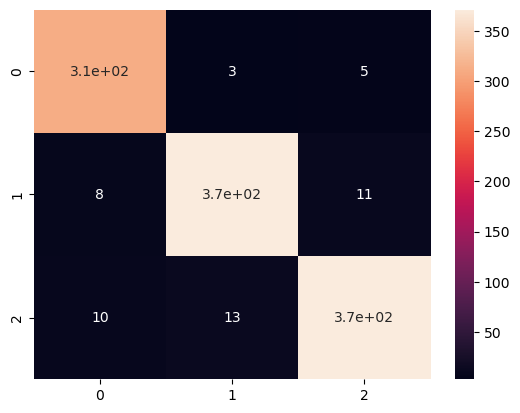

In [31]:
# can you plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target,test_predict)
print(cm)
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()